In [1]:
import pandas as pd
import numpy as np
from Frame import myDataset

In [2]:
filePathList = myDataset.getFiles("../dataset",".csv")

In [3]:
for i in range(len(filePathList)):
    print(filePathList[i])

../dataset\Multivariate_Interpolation\Economise_Hong Kong Island_Multivariate_Interpolation.csv
../dataset\Multivariate_Interpolation\Economise_Kowloon_Multivariate_Interpolation.csv
../dataset\Multivariate_Interpolation\Economise_New Territories_Multivariate_Interpolation.csv
../dataset\Multivariate_Interpolation\Hong Kong Island_Multivariate_Interpolation.csv
../dataset\Multivariate_Interpolation\Kowloon_Multivariate_Interpolation.csv
../dataset\Multivariate_Interpolation\New Territories_Multivariate_Interpolation.csv


In [4]:
Economise_HK_Data = pd.read_csv(filePathList[0])
Economise_KL_Data = pd.read_csv(filePathList[1])
Economise_NT_Data = pd.read_csv(filePathList[2])
General_HK_Data = pd.read_csv(filePathList[3])
General_KL_Data = pd.read_csv(filePathList[4])
General_NT_Data = pd.read_csv(filePathList[5])

In [5]:
print("Economise_HK_Data.shape %s"%(str(Economise_HK_Data.shape)))
print("Economise_KL_Data.shape %s"%(str(Economise_KL_Data.shape)))
print("Economise_NT_Data.shape %s"%(str(Economise_NT_Data.shape)))

print("General_HK_Data.shape %s"%(str(General_HK_Data.shape)))
print("General_KL_Data.shape %s"%(str(General_KL_Data.shape)))
print("General_NT_Data.shape %s"%(str(General_NT_Data.shape)))

print("Economise data feature name",Economise_NT_Data.columns.tolist())

print("General data feature name",General_NT_Data.columns.tolist())

Economise_HK_Data.shape (177475, 32)
Economise_KL_Data.shape (275891, 32)
Economise_NT_Data.shape (866308, 32)
General_HK_Data.shape (164718, 22)
General_KL_Data.shape (272857, 22)
General_NT_Data.shape (870651, 22)
Economise data feature name ['Date', 'year', 'month', 'day', 'District', 'Estate', 'Change', 'Building_Area', 'Usable_Area_Unit_Price', 'Contract_Form', 'Total_Trans_for_the_unit', 'Occupancy_Date', 'Estate_Total_Units', 'Total_Blocks', 'Developer', 'Management_Co', 'Kinder_Grden', 'Primary', 'Secondary', 'Longitude', 'Latitude', 'Building_Area_Unit_Price', 'Legal_tender_notes_and_coins_in_hands_of_public', 'Demand_deposits_with_licensed_banks', 'M1', 'Savings_deposits_with_licensed_banks', 'Time_deposits_with_licensed_banks', 'NCDs_issued_by_licensed_banks_and_held_by_public', 'M2', 'Deposits_with_RLBs_DTCs', 'NCDs_issued_by_RLBs_DTCs_and_held_by_public', 'M3']
General data feature name ['Date', 'District', 'Estate', 'Total_Price', 'Change', 'Building_Area', 'Usable_Area',

### 按照年份切分训练集和测试集

In [6]:
### 测试一下
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Economise_HK_Data)
Economise_HK_DataS = scaler.transform(Economise_HK_Data)

In [7]:
Economise_HK_Data.values[0]

array([1.61452800e+09, 2.02100000e+03, 3.00000000e+00, 4.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.54906999e+02, 6.80000000e+02,
       1.75680000e+04, 1.00000000e+00, 1.00000000e+00, 1.98700000e+03,
       6.64800000e+03, 1.70000000e+01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.22841474e+01,
       1.14215287e+02, 1.43380000e+04, 1.77819868e+05, 5.77001836e+05,
       7.54821920e+05, 1.85150748e+06, 3.04278153e+06, 1.83038196e+05,
       5.83218206e+06, 3.52520714e+04, 5.73535187e+03, 6.14422880e+06])

In [8]:
Economise_HK_DataS[0]

array([ 2.41823817e+00,  2.46428292e+00, -9.01361912e-01, -1.39944812e+00,
       -1.42142875e+00, -1.21464881e+00,  1.64144506e+00, -2.77685970e-01,
        2.56759706e+00, -5.33066562e-01, -1.19204022e+00,  5.44633228e-01,
        5.78026388e-01, -8.90206082e-02, -5.71871078e-01, -1.86124085e+00,
       -9.82704851e-01, -9.82704851e-01, -9.82704851e-01,  6.36782655e-01,
        5.62268338e-01,  2.63171794e+00,  1.12555424e-04, -2.02636095e-05,
        3.49519782e-07,  3.23417670e-06, -4.50395619e-03,  2.96376338e-02,
        1.16309119e-05, -2.74608428e-03,  6.39608937e-04,  9.56534919e-02])

In [9]:
type(Economise_HK_DataS)
test = pd.DataFrame(Economise_HK_DataS)
test.shape
test.columns = Economise_HK_Data.columns


In [10]:
from sklearn.preprocessing import StandardScaler

def Shard_the_dataset(df,yearNum = 2018):
    scaler = StandardScaler()
    scaler.fit(df.drop("Usable_Area_Unit_Price",axis = 1))
    

    trainDataset = df.loc[df['year'] < yearNum]
    testDataset = df.loc[df['year'] >= yearNum]
    
    print(df.shape,trainDataset.shape,testDataset.shape)
    print(trainDataset.columns.tolist())
    X_train = trainDataset.drop("Usable_Area_Unit_Price",axis = 1)
    y_train = trainDataset.Usable_Area_Unit_Price
    X_test = testDataset.drop("Usable_Area_Unit_Price",axis = 1)
    y_test = testDataset.Usable_Area_Unit_Price
    
    npT = scaler.transform(X_train)
    dfT = pd.DataFrame(npT)
    pd.DataFrame(dfT)
    dfT.columns = X_train.columns
    X_train = dfT
    
    npT = scaler.transform(X_test)
    dfT = pd.DataFrame(npT)
    pd.DataFrame(dfT)
    dfT.columns = X_test.columns
    X_test = dfT
    
    
    return {"X_train":X_train,"y_train":y_train,"X_test":X_test,"y_test":y_test}



In [11]:
Economise_HK_Data = Shard_the_dataset(Economise_HK_Data,yearNum = 2018)
Economise_KL_Data = Shard_the_dataset(Economise_KL_Data,yearNum = 2018)
Economise_NT_Data = Shard_the_dataset(Economise_NT_Data,yearNum = 2018)
# General_HK_Data = Shard_the_dataset(General_HK_Data,yearNum = 2018)
# General_KL_Data = Shard_the_dataset(General_KL_Data,yearNum = 2018)
# General_NT_Data = Shard_the_dataset(General_NT_Data,yearNum = 2018)

(177475, 32) (168368, 32) (9107, 32)
['Date', 'year', 'month', 'day', 'District', 'Estate', 'Change', 'Building_Area', 'Usable_Area_Unit_Price', 'Contract_Form', 'Total_Trans_for_the_unit', 'Occupancy_Date', 'Estate_Total_Units', 'Total_Blocks', 'Developer', 'Management_Co', 'Kinder_Grden', 'Primary', 'Secondary', 'Longitude', 'Latitude', 'Building_Area_Unit_Price', 'Legal_tender_notes_and_coins_in_hands_of_public', 'Demand_deposits_with_licensed_banks', 'M1', 'Savings_deposits_with_licensed_banks', 'Time_deposits_with_licensed_banks', 'NCDs_issued_by_licensed_banks_and_held_by_public', 'M2', 'Deposits_with_RLBs_DTCs', 'NCDs_issued_by_RLBs_DTCs_and_held_by_public', 'M3']
(275891, 32) (262324, 32) (13567, 32)
['Date', 'year', 'month', 'day', 'District', 'Estate', 'Change', 'Building_Area', 'Usable_Area_Unit_Price', 'Contract_Form', 'Total_Trans_for_the_unit', 'Occupancy_Date', 'Estate_Total_Units', 'Total_Blocks', 'Developer', 'Management_Co', 'Kinder_Grden', 'Primary', 'Secondary', 'Lo

In [12]:
import numpy as np
np.set_printoptions(suppress=True) # 不要科学计数法

In [13]:
for k,v in Economise_HK_Data.items():
    print(k,v.shape)
    print(v.values[0])

X_train (168368, 31)
[ 1.9293938   1.8604096   1.71835461  1.50665062  0.71695451  0.15390929
  2.62599053 -0.70370133 -0.53306656 -0.53293792  0.5517826  -0.25642763
 -0.39746655 -0.57187108  1.09943173  0.91454394  0.91454394  0.91454394
 -0.67027192  1.44786888  0.42134533  2.52241819  2.46370856  2.47979705
  2.60715618  2.26226325  2.72926268  2.5589157   0.65291971 -0.00871028
  2.57292563]
y_train (168368,)
9218.849714912474
X_test (9107, 31)
[ 2.41823817  2.46428292 -0.90136191 -1.39944812 -1.42142875 -1.21464881
  1.64144506 -0.27768597 -0.53306656 -1.19204022  0.54463323  0.57802639
 -0.08902061 -0.57187108 -1.86124085 -0.98270485 -0.98270485 -0.98270485
  0.63678266  0.56226834  2.63171794  0.00011256 -0.00002026  0.00000035
  0.00000323 -0.00450396  0.02963763  0.00001163 -0.00274608  0.00063961
  0.09565349]
y_test (9107,)
17568.0


### 数据pca

### 训练catboost试一下

In [14]:
from sklearn import metrics
import numpy as np

def reg_calculate(true, prediction):
    mse = metrics.mean_squared_error(true, prediction)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(true, prediction)
    mape = np.mean(np.abs((true - prediction) / true)) * 100
    r2 = metrics.r2_score(true, prediction)
    rmsle = np.sqrt(metrics.mean_squared_log_error(true, prediction))
    print("mse: {}, rmse: {}, mae: {}, mape: {}, r2: {}, rmsle: {}".format(mse, rmse, mae, mape, r2, rmsle))
    # return mse, rmse, mae, mape, r2, rmsle
    


In [15]:
import catboost as cb

In [16]:
CB_Regressor=cb.CatBoostRegressor()

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import geatpy as ea
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import multiprocessing as mp
from multiprocessing import Pool as ProcessPool
from multiprocessing.dummy import Pool as ThreadPool


"""
该案例展示了如何利用进化算法+多进程/多线程来优化SVM中的两个参数：C和Gamma。
在执行本案例前，需要确保正确安装sklearn，以保证SVM部分的代码能够正常执行。
本函数需要用到一个外部数据集，存放在同目录下的iris.data中，
并且把iris.data按3:2划分为训练集数据iris_train.data和测试集数据iris_test.data。
有关该数据集的详细描述详见http://archive.ics.uci.edu/ml/datasets/Iris
在执行脚本main.py中设置PoolType字符串来控制采用的是多进程还是多线程。
注意：使用多进程时，程序必须以“if __name__ == '__main__':”作为入口，
  这个是multiprocessing的多进程模块的硬性要求。
"""


class MyProblem(ea.Problem): # 继承Problem父类
def __init__(self, PoolType): # PoolType是取值为'Process'或'Thread'的字符串
    name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
    M = 1 # 初始化M（目标维数）
    maxormins = [-1] # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
    Dim = 2 # 初始化Dim（决策变量维数）
    varTypes = [0, 0] # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
    lb = [2**(-8)] * Dim # 决策变量下界
    ub = [2**8] * Dim # 决策变量上界
    lbin = [1] * Dim # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
    ubin = [1] * Dim # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
# 调用父类构造方法完成实例化
    ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
# 目标函数计算中用到的一些数据
    fp = open('iris_train.data')
    datas = []
    data_targets = []
for line in fp.readlines():
        line_data = line.strip('\n').split(',')
        data = []
for i in line_data[0:4]:
            data.append(float(i))
        datas.append(data)
        data_targets.append(line_data[4])
    fp.close()
    self.data = preprocessing.scale(np.array(datas)) # 训练集的特征数据（归一化）
    self.dataTarget = np.array(data_targets)
# 设置用多线程还是多进程
    self.PoolType = PoolType
if self.PoolType == 'Thread':
        self.pool = ThreadPool(2) # 设置池的大小
elif self.PoolType == 'Process':
        num_cores = int(mp.cpu_count()) # 获得计算机的核心数
        self.pool = ProcessPool(num_cores) # 设置池的大小

def aimFunc(self, pop): # 目标函数，采用多线程加速计算
    Vars = pop.Phen # 得到决策变量矩阵
    args = list(zip(list(range(pop.sizes)), [Vars] * pop.sizes, [self.data] * pop.sizes, [self.dataTarget] * pop.sizes)) # pop.sizes就是种群的规模,args=[[种群大小],[决策变量*种群大小],[特征*种群大小],[分类target*种群大小]]，args含义见下面subAimFunc(args)函数
if self.PoolType == 'Thread':
        pop.ObjV = np.array(list(self.pool.map(subAimFunc, args))) # 目标函数是一个np.array，也就是每次调参的分类结果的交叉验证得分
elif self.PoolType == 'Process':
        result = self.pool.map_async(subAimFunc, args)
        result.wait()
        pop.ObjV = np.array(result.get())

def test(self, C, G): # 代入优化后的C、Gamma对测试集进行检验
# 读取测试集数据
    fp = open('iris_test.data')
    datas = []
    data_targets = []
for line in fp.readlines():
        line_data = line.strip('\n').split(',')
        data = []
for i in line_data[0:4]:
            data.append(float(i))
        datas.append(data)
        data_targets.append(line_data[4])
    fp.close()
    data_test = preprocessing.scale(np.array(datas)) # 测试集的特征数据（归一化）
    dataTarget_test = np.array(data_targets) # 测试集的标签数据
    svc = svm.SVC(C=C, kernel='rbf', gamma=G).fit(self.data, self.dataTarget) # 创建分类器对象并用训练集的数据拟合分类器模型
    dataTarget_predict = svc.predict(data_test) # 采用训练好的分类器对象对测试集数据进行预测
    print("测试集数据分类正确率 = %s%%"%(len(np.where(dataTarget_predict == dataTarget_test)[0]) / len(dataTarget_test) * 100))

def subAimFunc(args): # 计算每一次模型调参的分类结果的交叉验证得分,模型一共训练了pop.sizes次，每一次的模型训练作为一个种群的样本
i = args[0]
Vars = args[1]
data = args[2]
dataTarget = args[3]
C = Vars[i, 0] # 调参1
G = Vars[i, 1] # 调参2
svc = svm.SVC(C=C, kernel='rbf', gamma=G).fit(data, dataTarget) # 创建分类器对象并用训练集的数据拟合分类器模型
scores = cross_val_score(svc, data, dataTarget, cv=30) # 计算交叉验证的得分
ObjV_i = [scores.mean()] # 把交叉验证的平均得分作为目标函数值
return ObjV_i

SyntaxError: invalid syntax (<ipython-input-3-0d537e2cc74e>, line 29)

In [ ]:
import numpy as np
import geatpy as ea # import geatpy
import sklearn.datasets
import numpy as np
import random


data = sklearn.datasets.load_digits()
X = data["data"]
y = data["target"]

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

paramgrid = {"kernel": ["rbf"],
             "C"     : np.logspace(-9, 9, num=25, base=10),
             "gamma" : np.logspace(-9, 9, num=25, base=10)}

random.seed(1)

from evolutionary_search import EvolutionaryAlgorithmSearchCV
cv = EvolutionaryAlgorithmSearchCV(estimator=SVC(),
                                   params=paramgrid,
                                   scoring="accuracy",
                                   cv=StratifiedKFold(n_splits=4),
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=4)
cv.fit(X, y)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda3\lib\site-packages\evolutionary_search\cv.py:407: UserWarning: Windows requires Pools to be declared from within an 'if __name__=="__main__":' structure. In this case, n_jobs will accept map functions as well to facilitate custom parallelism. Please check to see that all code is working as expected.
  warnings.warn(("Windows requires Pools to be declared from within "


Types [1, 2, 2] and maxint [0, 24, 24] detected
--- Evolve in 625 possible combinations ---


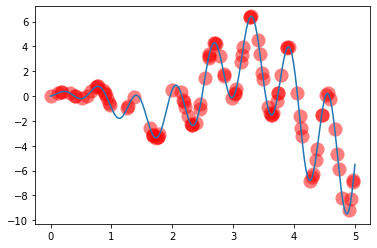

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 1]


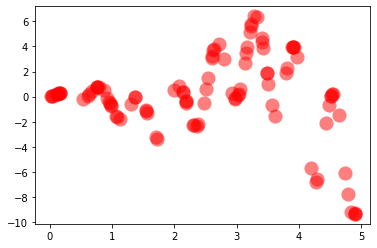

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 0]


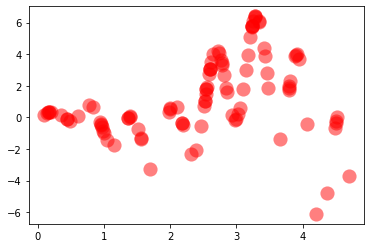

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 0]


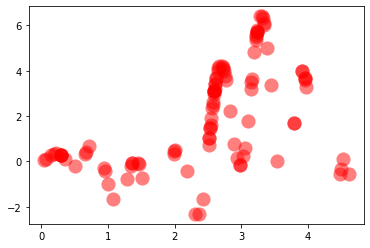

Most fitted DNA:  [1 0 1 0 1 0 0 0 0 0]


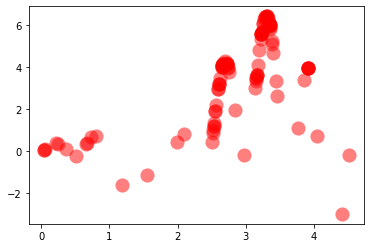

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


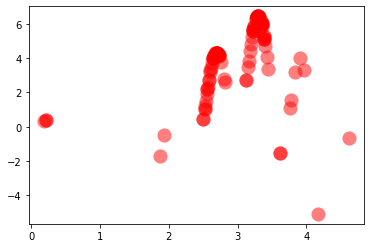

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


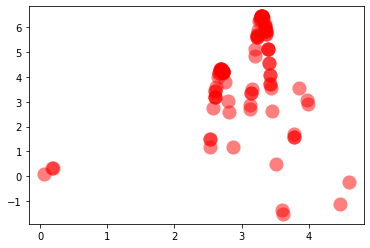

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


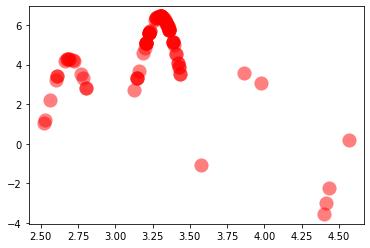

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


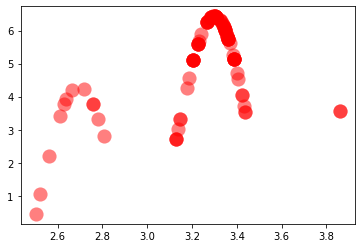

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


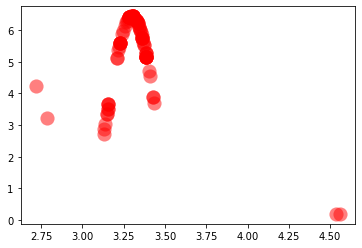

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


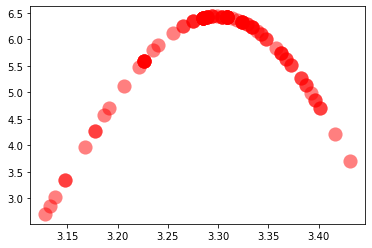

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


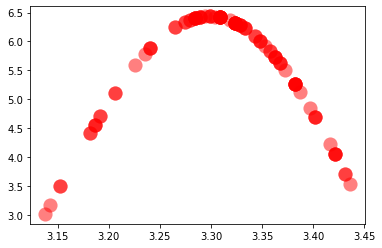

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


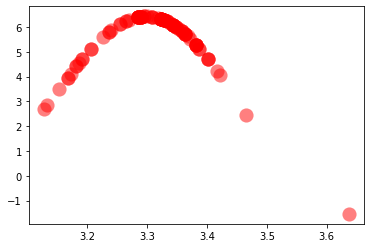

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


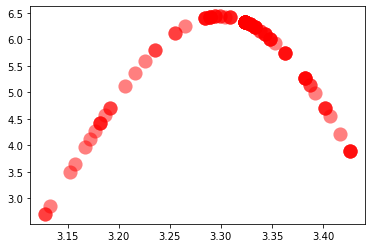

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


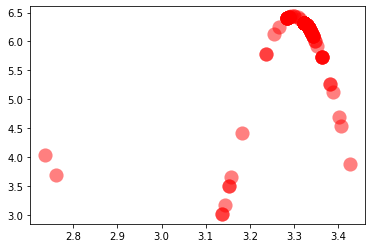

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


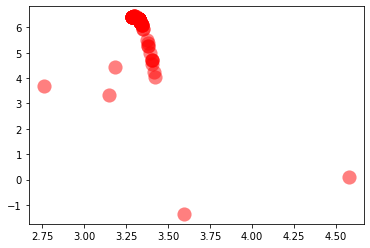

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


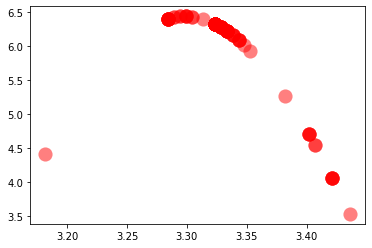

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


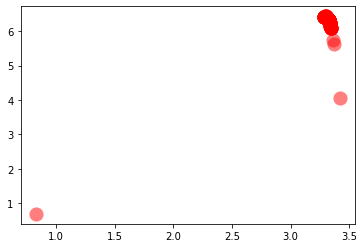

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


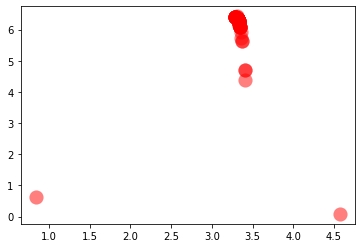

Most fitted DNA:  [1 0 1 0 1 0 0 1 0 0]


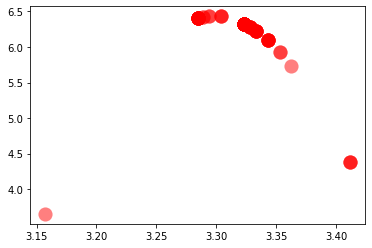

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


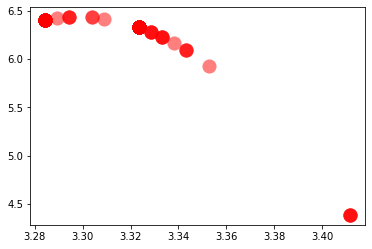

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


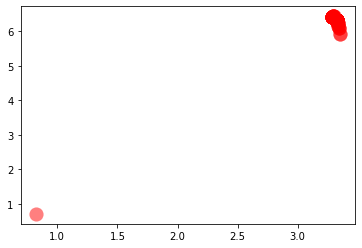

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


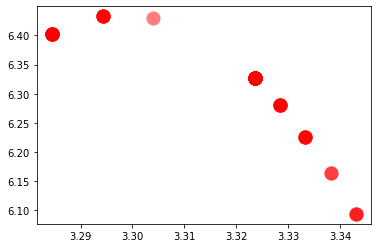

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


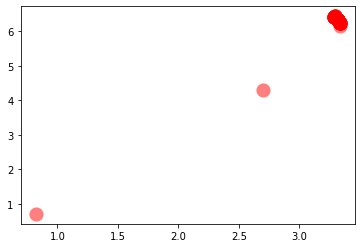

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


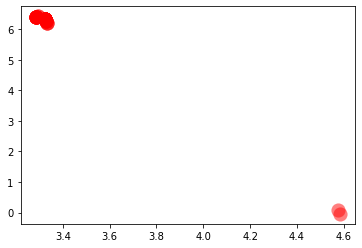

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


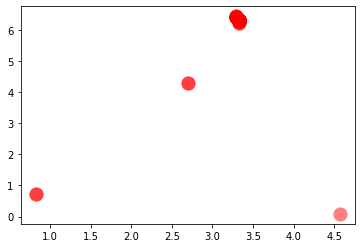

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


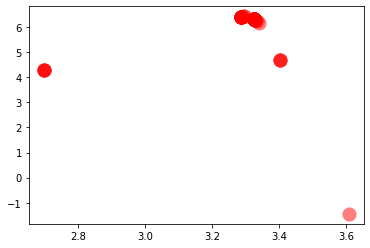

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


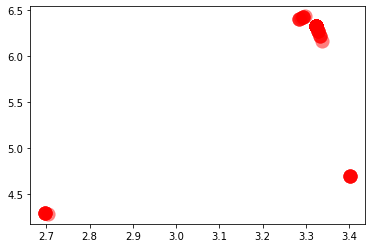

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


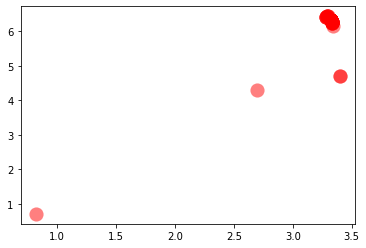

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


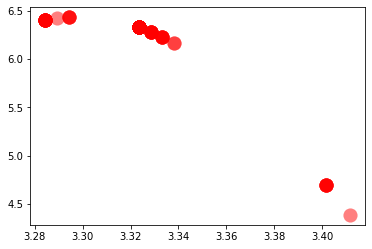

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


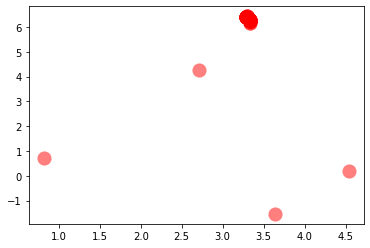

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


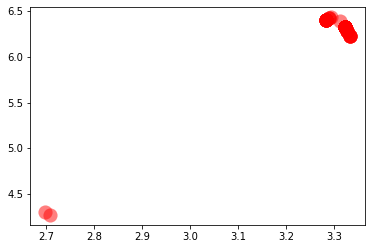

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


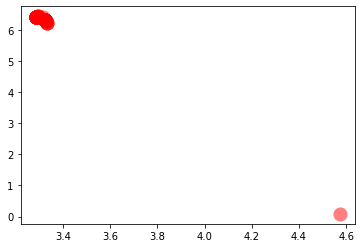

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


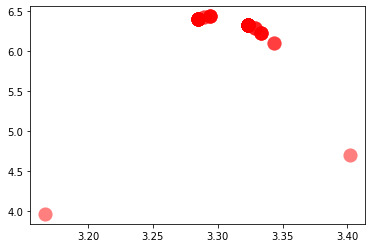

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


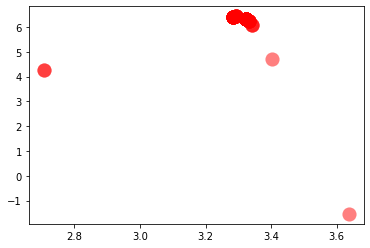

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


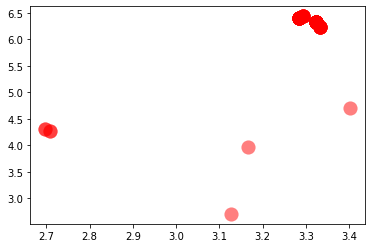

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


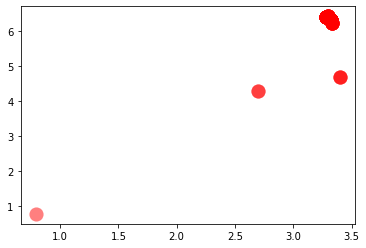

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


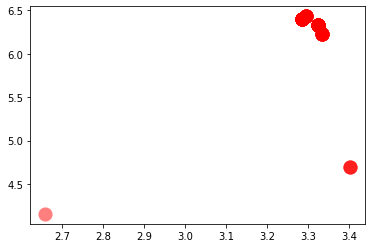

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


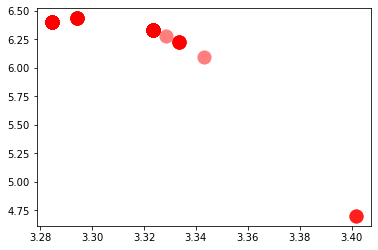

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


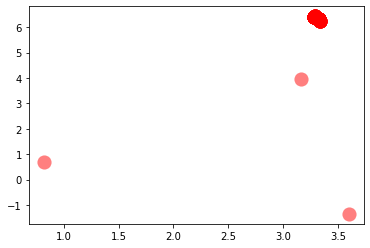

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


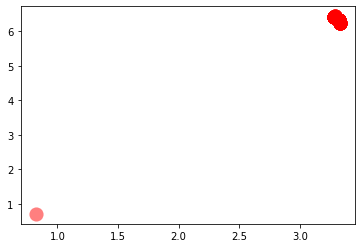

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


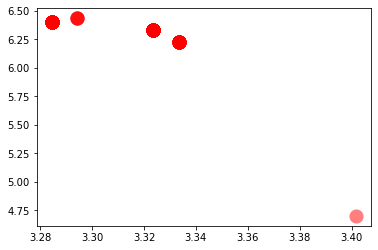

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


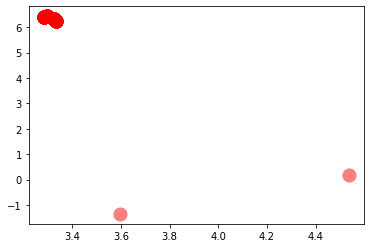

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


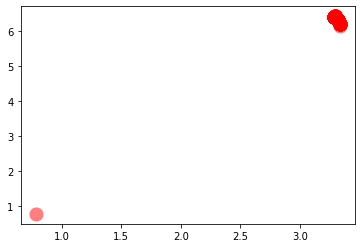

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


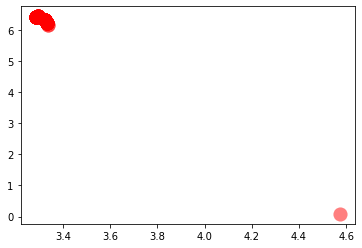

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


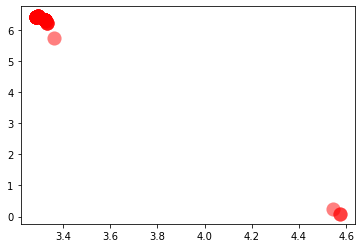

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


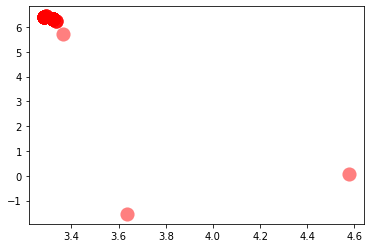

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


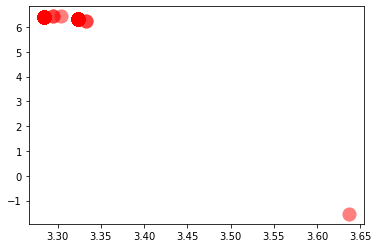

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


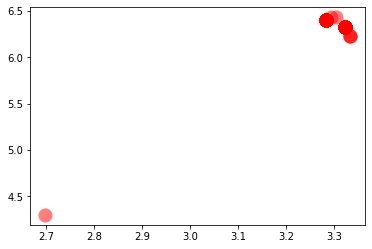

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


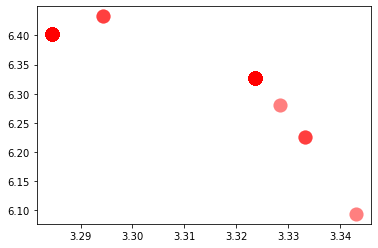

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


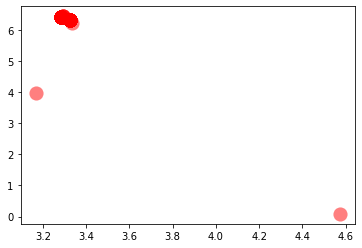

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


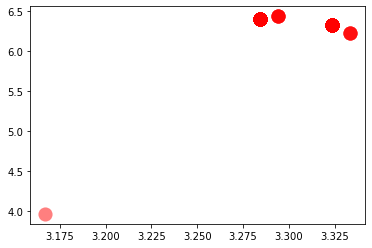

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


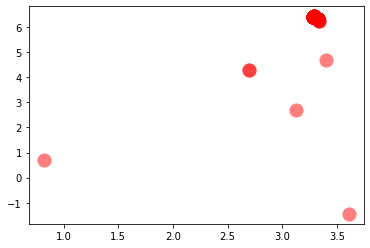

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


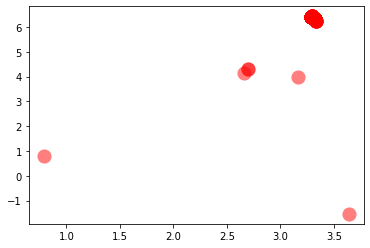

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


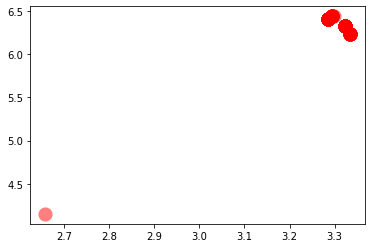

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


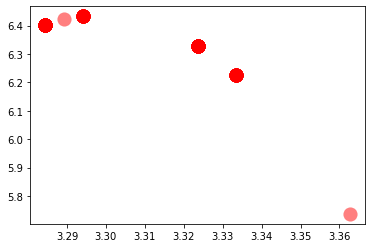

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


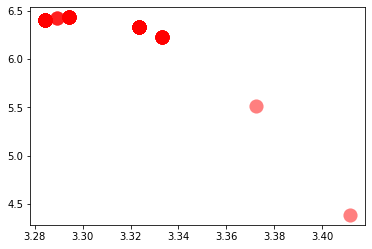

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


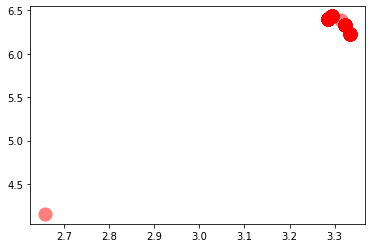

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


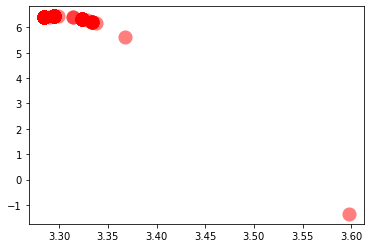

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


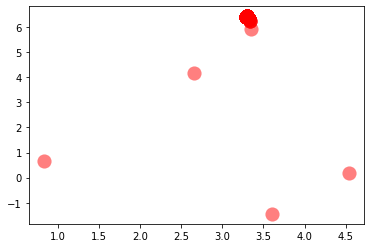

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


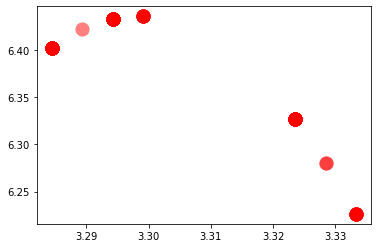

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


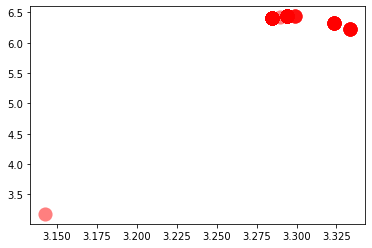

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


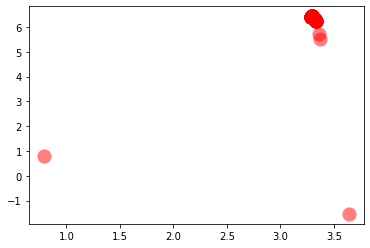

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


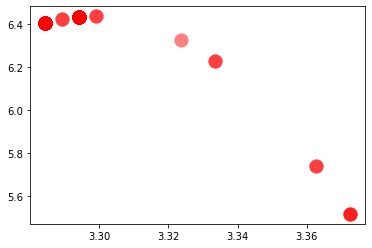

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


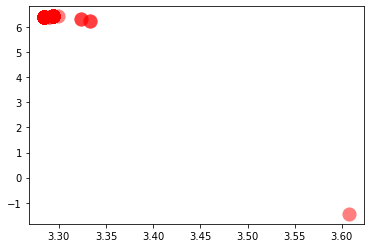

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


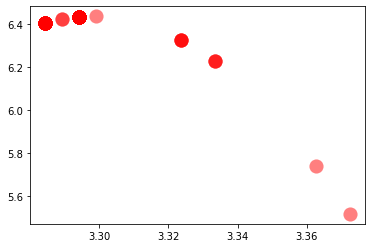

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


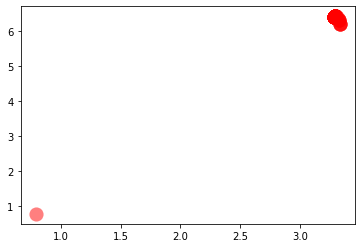

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


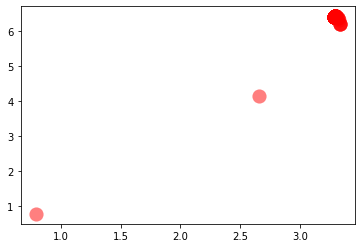

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


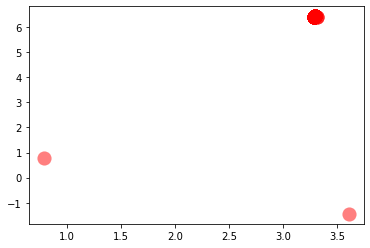

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


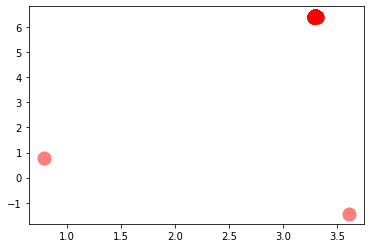

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


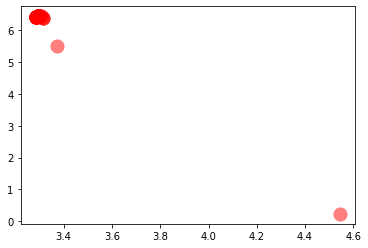

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


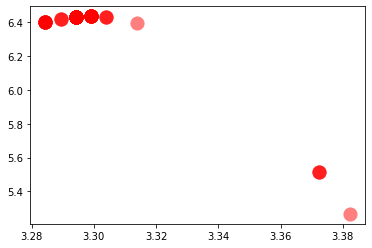

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


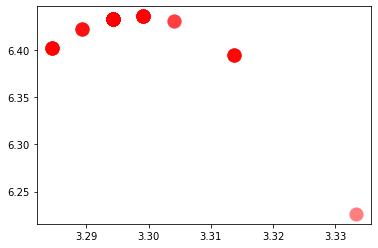

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


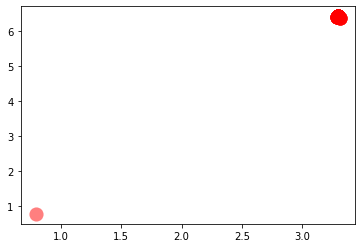

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


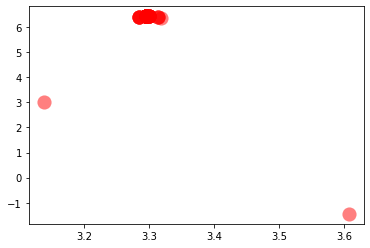

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


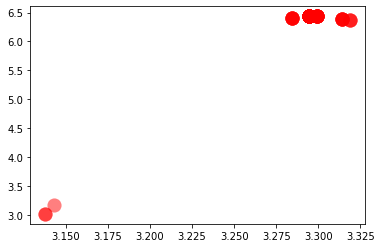

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


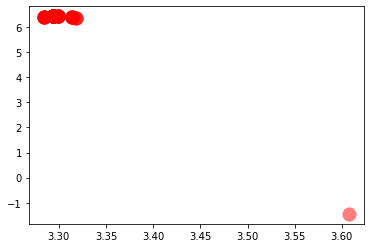

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


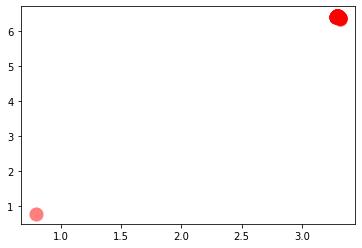

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


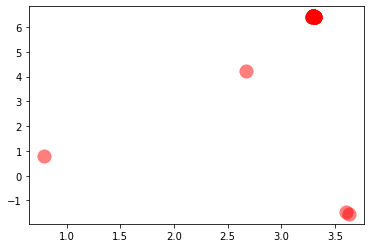

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


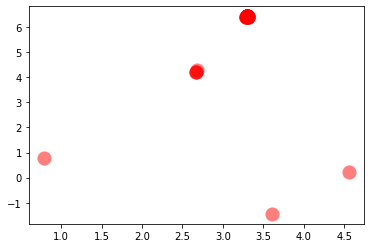

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


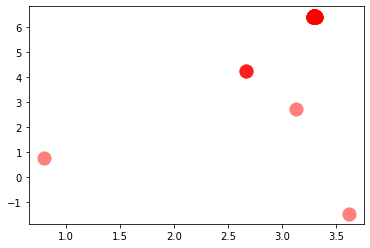

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


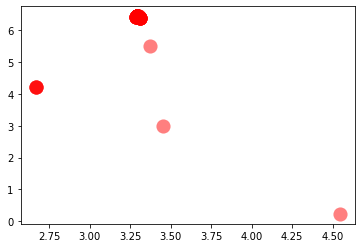

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


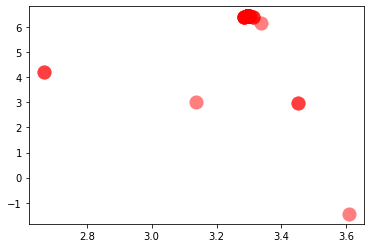

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


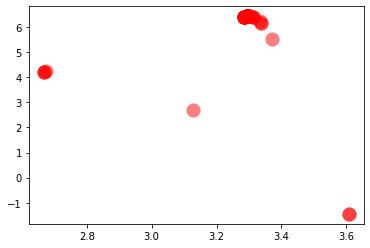

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


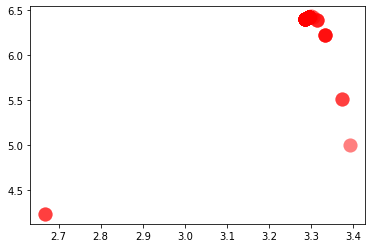

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


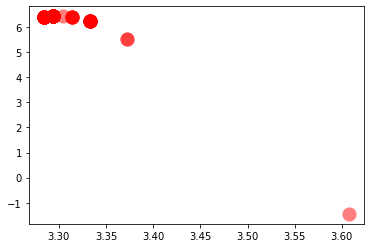

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


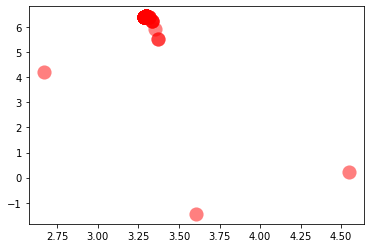

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


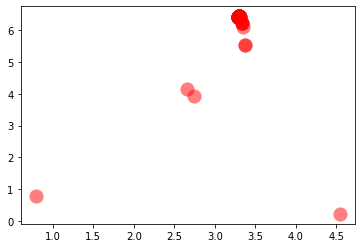

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 0]


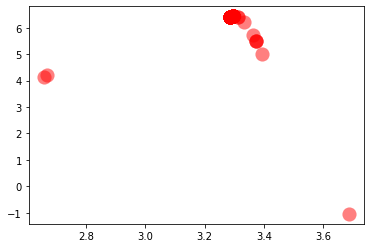

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


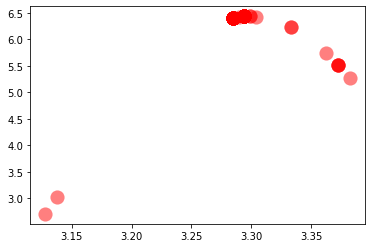

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


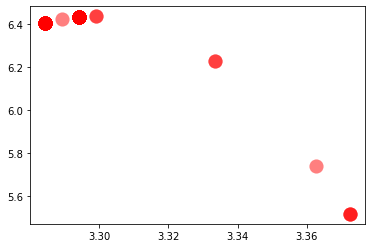

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


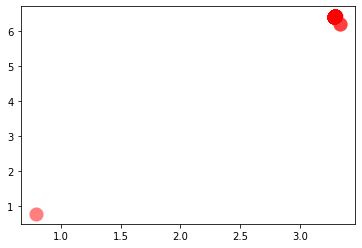

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


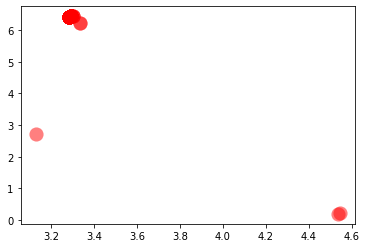

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


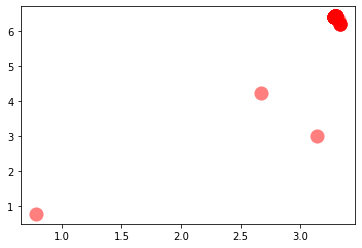

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


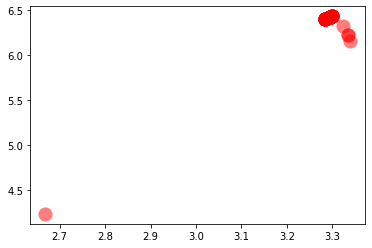

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


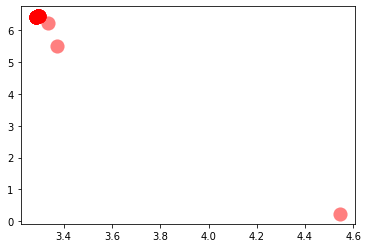

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


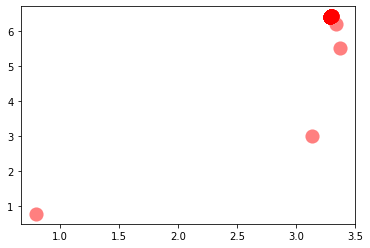

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


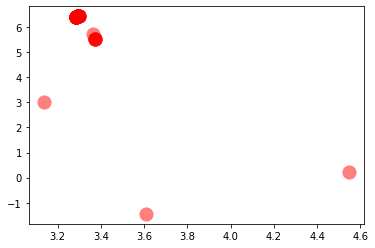

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


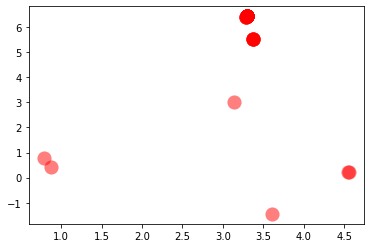

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


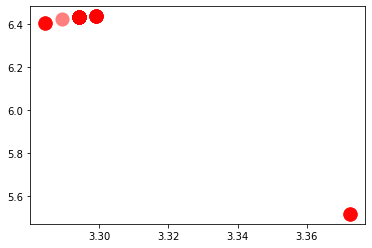

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


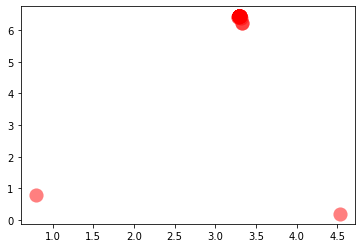

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


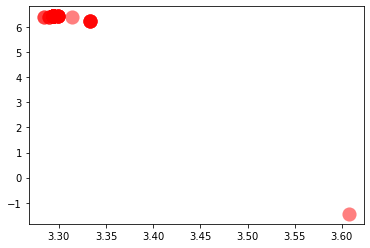

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


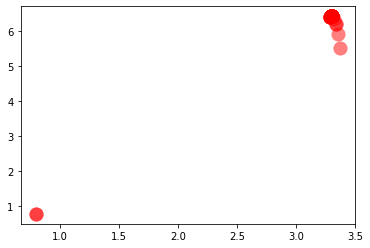

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


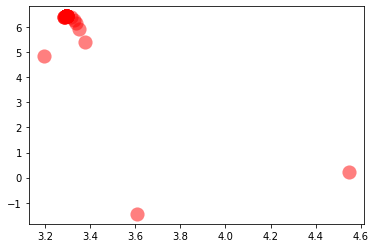

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


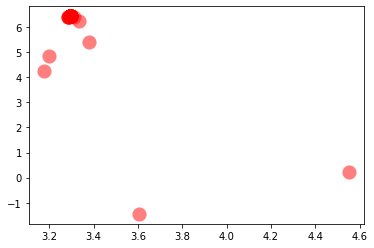

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


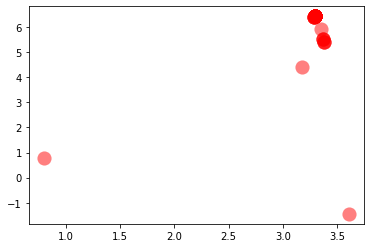

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


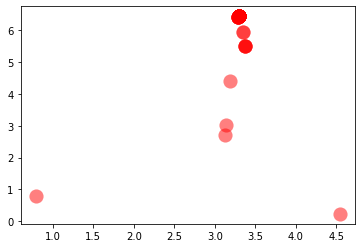

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


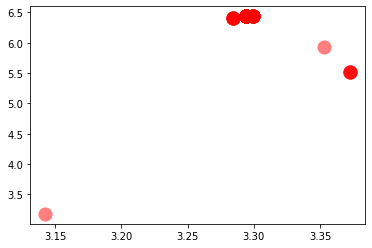

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


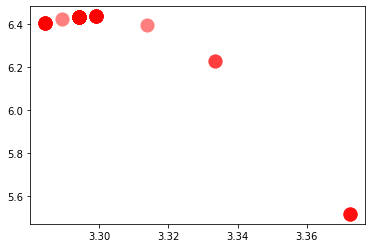

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


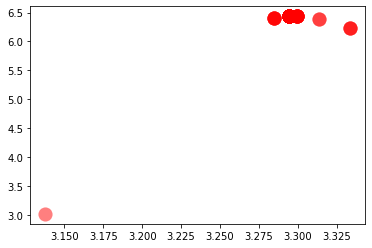

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


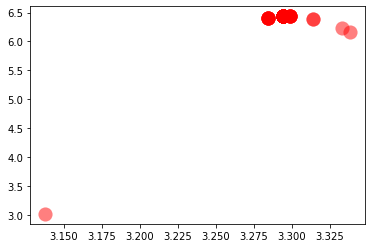

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


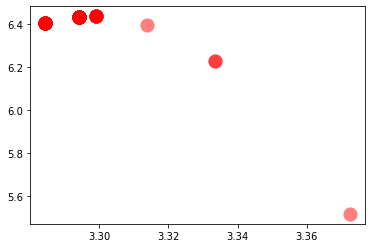

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


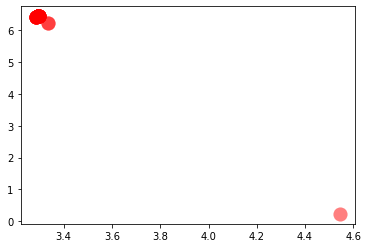

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


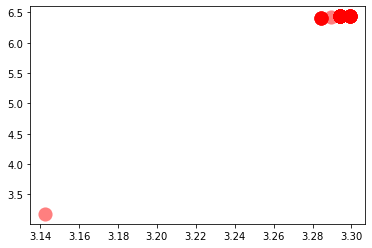

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


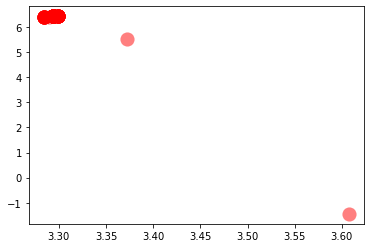

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


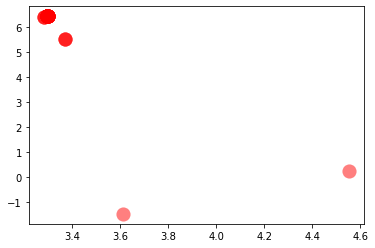

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


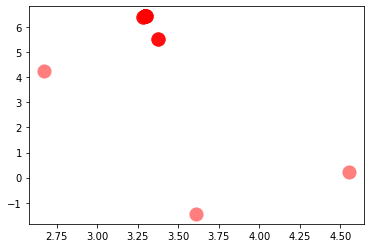

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


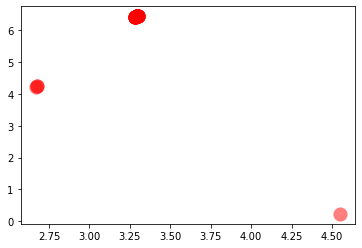

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


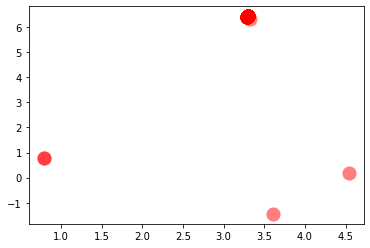

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


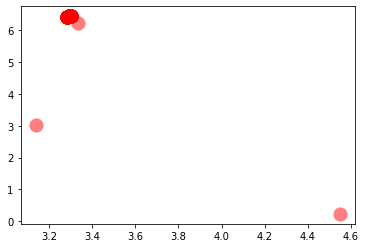

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


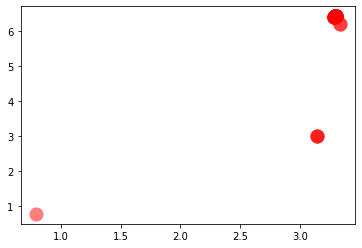

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


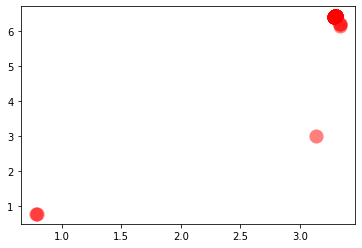

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


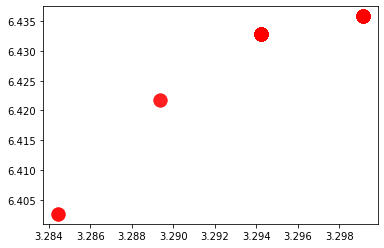

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


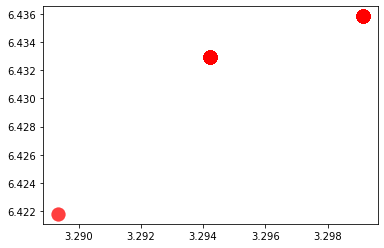

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


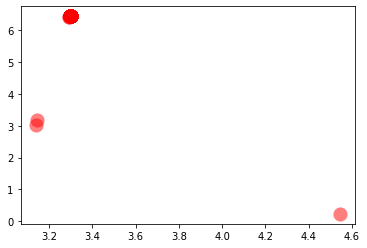

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


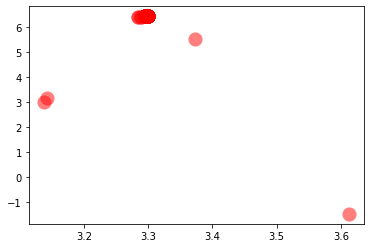

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


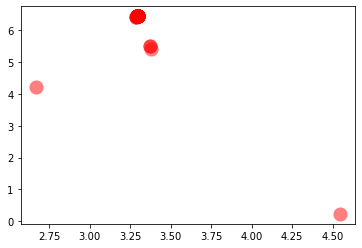

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


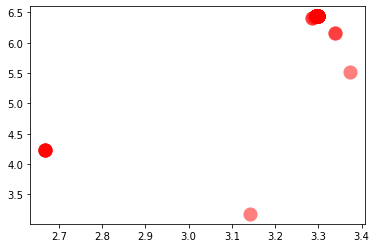

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


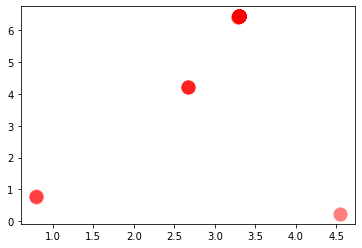

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


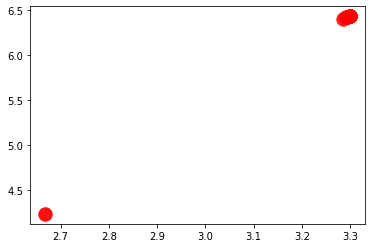

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


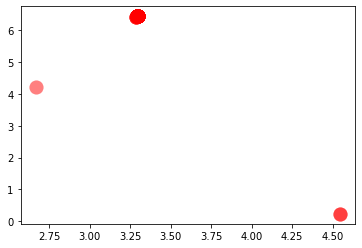

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


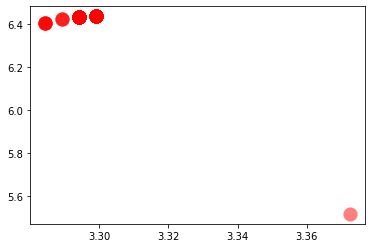

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


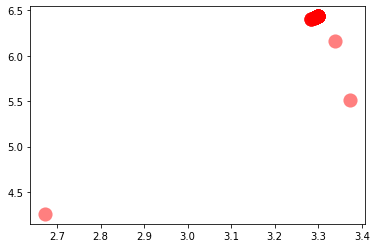

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


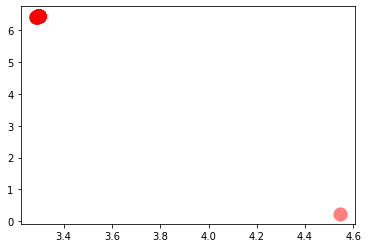

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


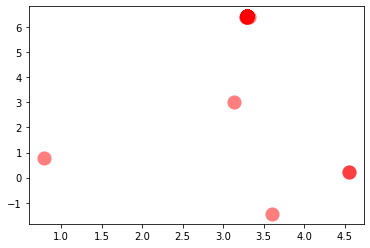

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


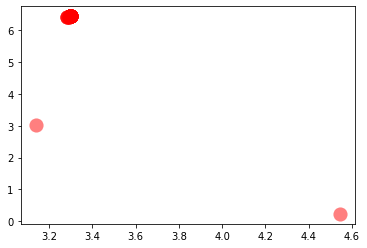

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


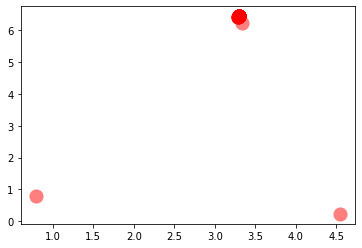

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


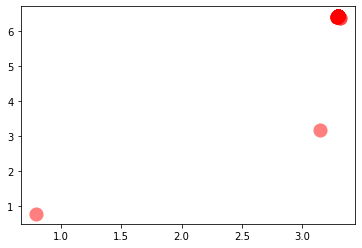

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


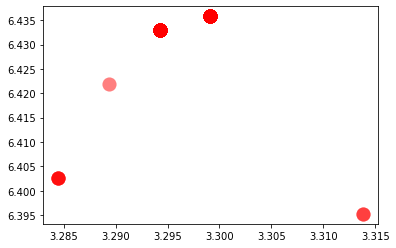

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


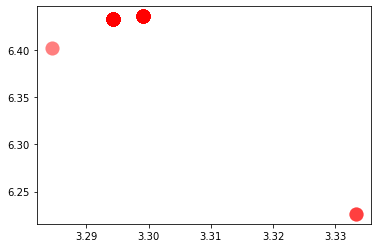

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


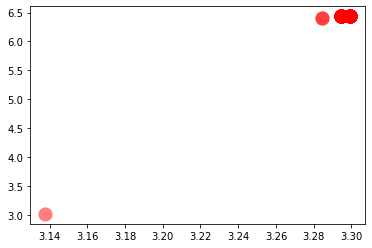

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


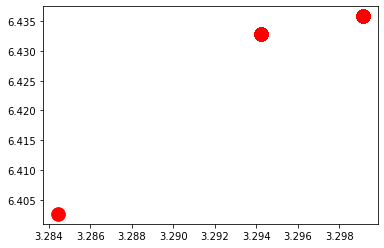

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


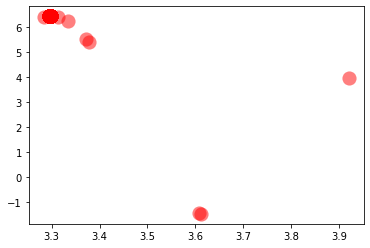

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


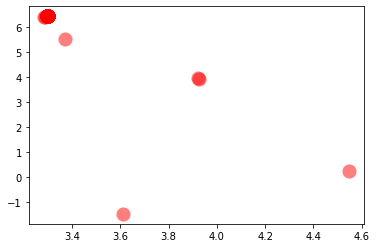

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


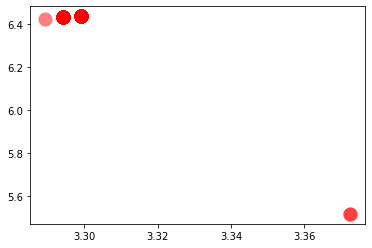

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


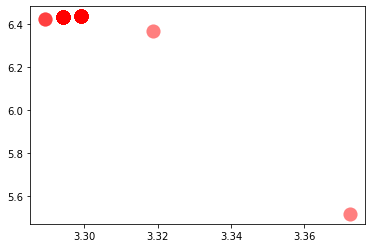

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


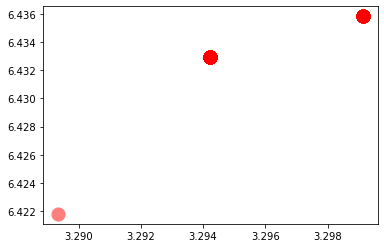

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


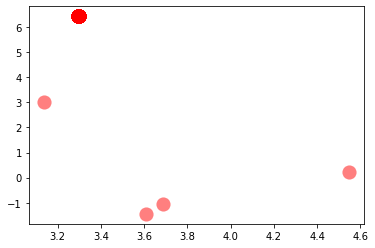

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


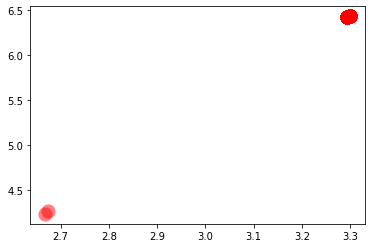

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


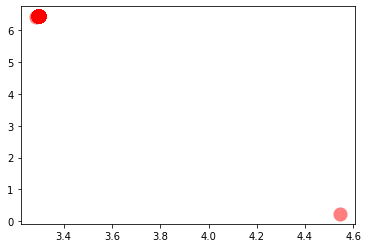

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


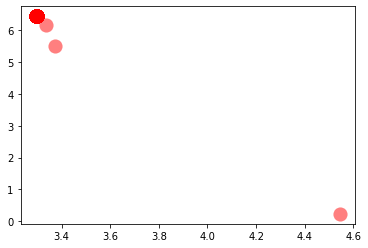

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


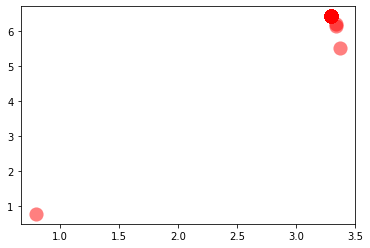

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


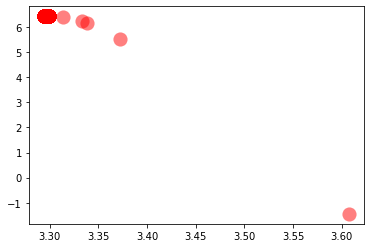

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


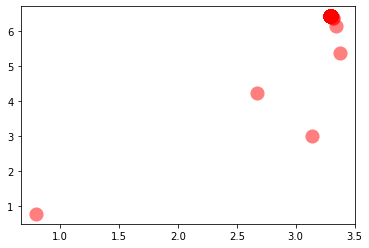

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


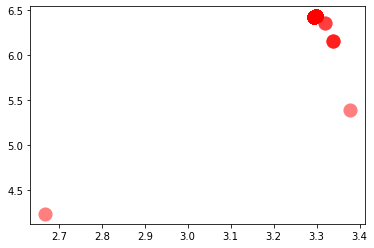

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


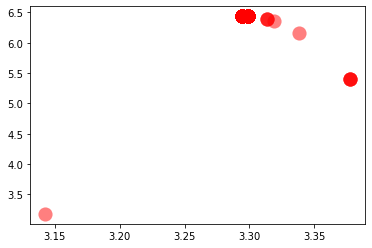

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


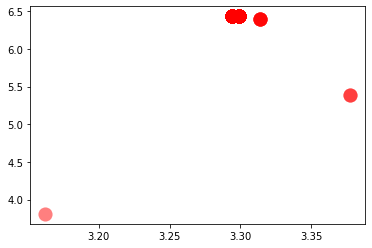

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


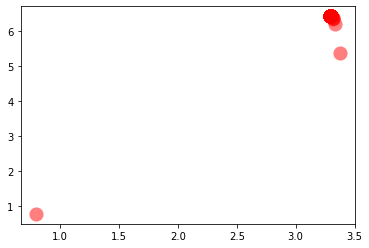

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


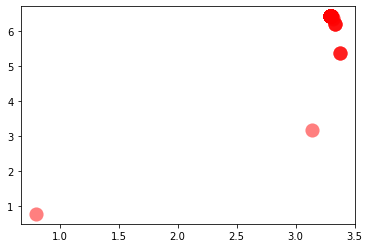

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


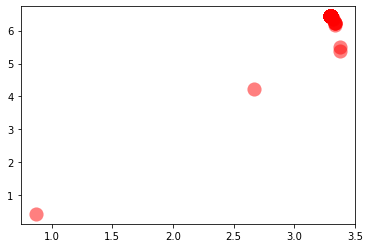

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


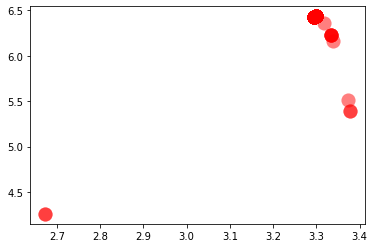

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


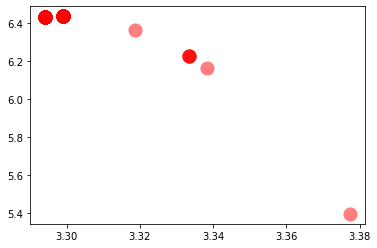

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


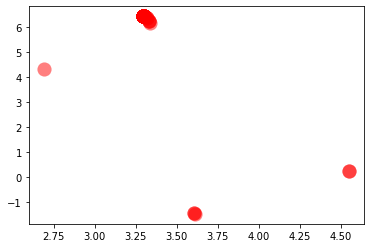

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


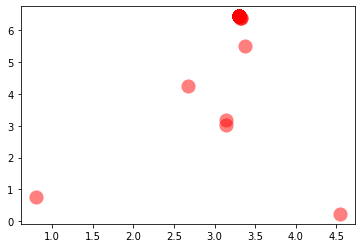

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


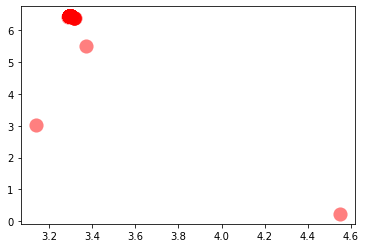

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


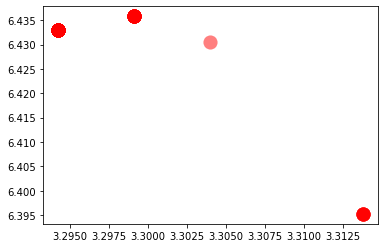

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


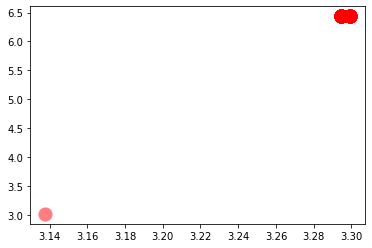

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


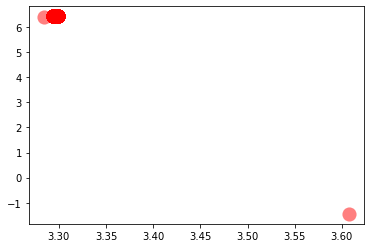

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


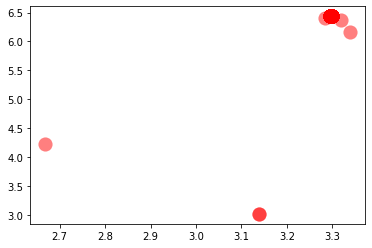

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


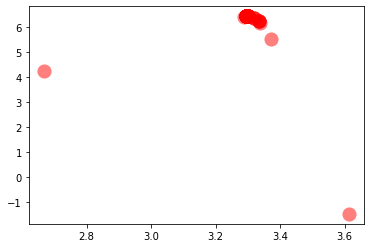

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


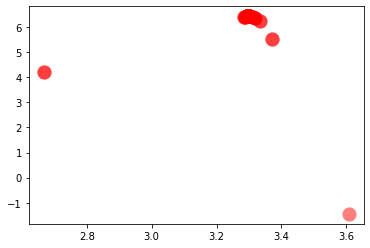

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


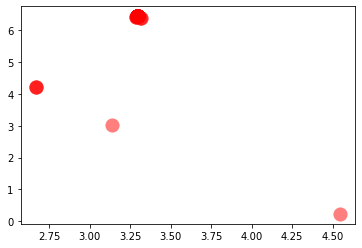

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


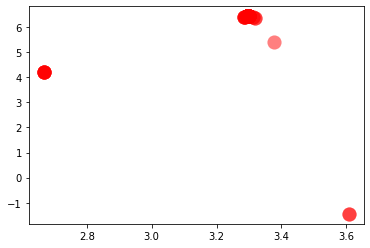

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


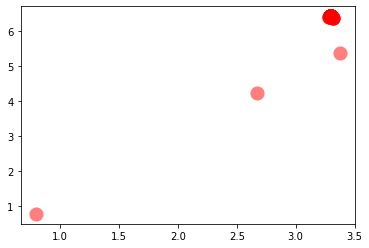

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


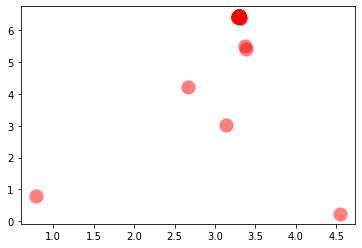

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


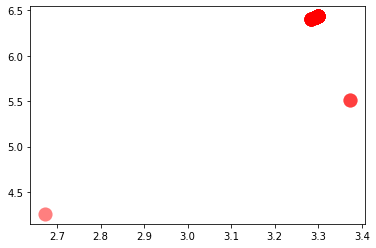

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


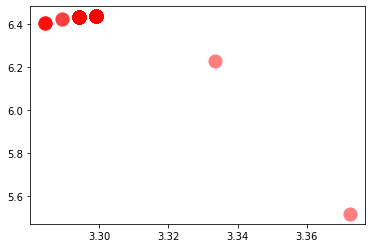

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


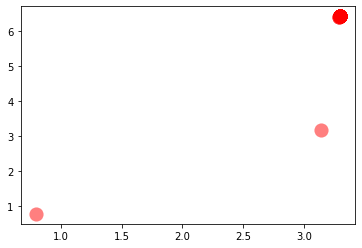

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


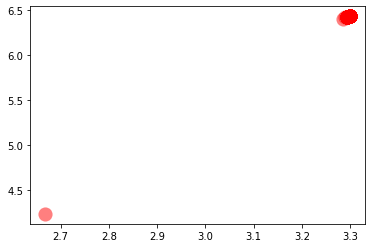

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


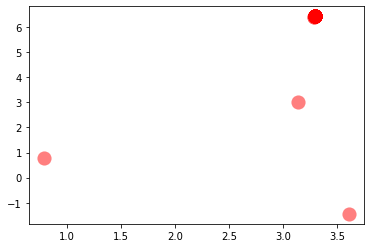

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


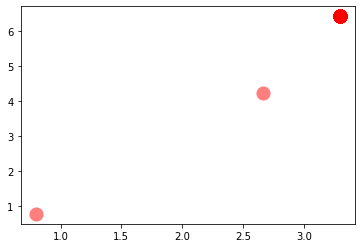

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


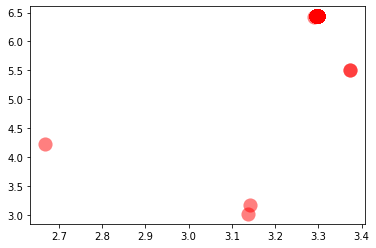

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


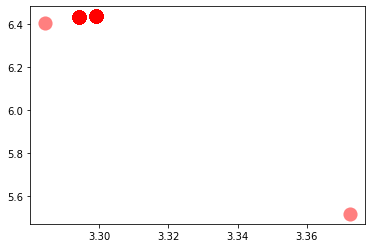

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


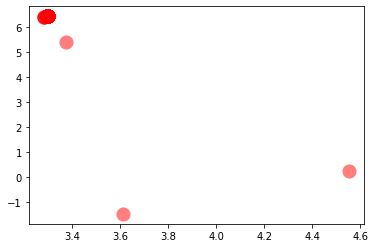

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


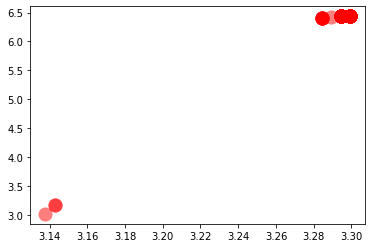

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


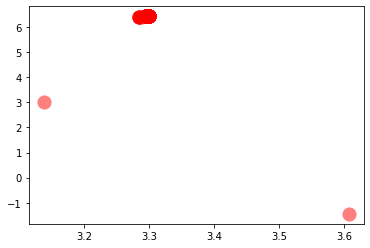

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


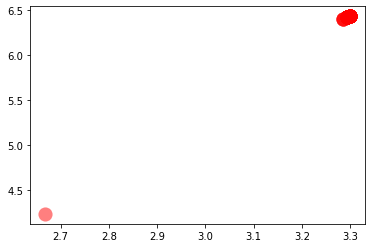

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


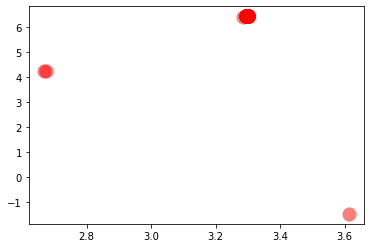

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


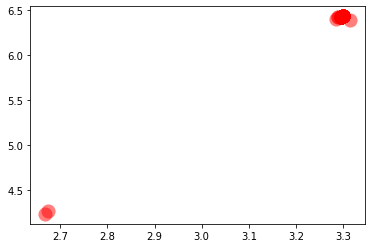

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


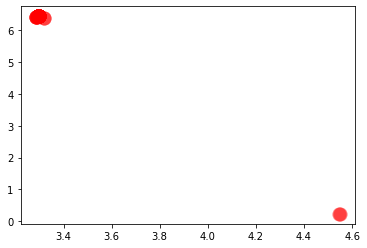

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


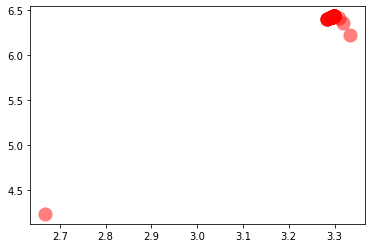

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


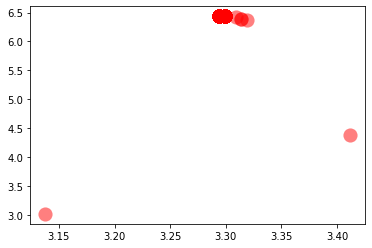

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


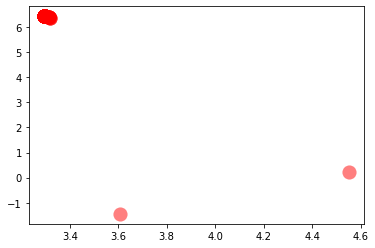

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


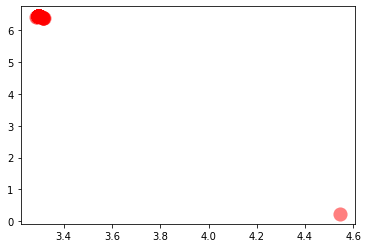

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


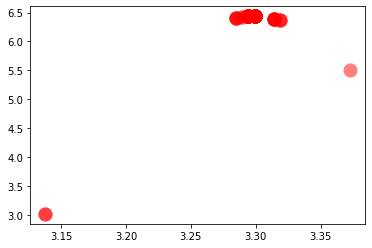

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


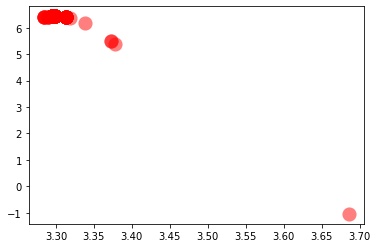

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


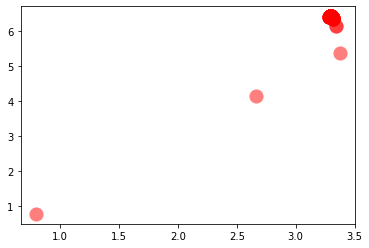

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


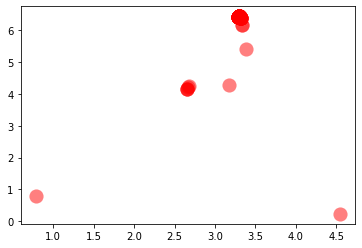

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


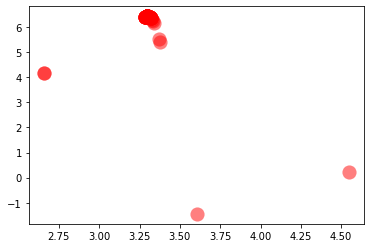

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


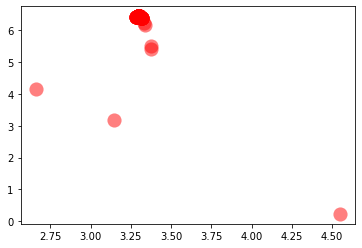

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]


In [17]:
"""
Visualize Genetic Algorithm to find a maximum point in a function.
Visit my tutorial website for more: https://mofanpy.com/tutorials/
"""
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds


def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function


# find non-zero fitness for selection
def get_fitness(pred): return pred + 1e-3 - np.min(pred)


# convert binary DNA to decimal and normalize it to a range(0, 5)
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]


def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]


def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent


def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child


pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   # initialize the pop DNA

plt.ion()       # something about plotting
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))

for _ in range(N_GENERATIONS):
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA

    # something about plotting
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # GA part (evolution)
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child

plt.ioff()
plt.show()

In [20]:
other_params = {
    'iterations': 1000,
    'learning_rate':0.03,
    'l2_leaf_reg':3,
    'bagging_temperature':1,
    'random_strength':1,
    'depth':6,
    'rsm':1,
    'one_hot_max_size':2,
    'leaf_estimation_method':'Gradient',
    'fold_len_multiplier':2,
    'border_count':128,
}


In [24]:
parameterDict = {"learning_rate":0.03,"depth":8,"l2_leaf_reg":48,"iterations":1000}
CB_Regressor=cb.CatBoostRegressor(**parameterDict)
CB_Regressor.fit(Economise_HK_Data["X_train"], Economise_HK_Data["y_train"])
y_pre_CB = CB_Regressor.predict(Economise_HK_Data["X_test"])
print("CB")
reg_calculate(Economise_HK_Data["y_test"], y_pre_CB)

0:	learn: 3342.0449985	total: 80.2ms	remaining: 1m 20s
1:	learn: 3249.1313766	total: 134ms	remaining: 1m 6s
2:	learn: 3157.3546264	total: 187ms	remaining: 1m 2s
3:	learn: 3069.2616547	total: 244ms	remaining: 1m
4:	learn: 2983.8742143	total: 298ms	remaining: 59.3s
5:	learn: 2899.7191105	total: 366ms	remaining: 1m
6:	learn: 2819.4064384	total: 424ms	remaining: 1m
7:	learn: 2740.3916851	total: 477ms	remaining: 59.1s
8:	learn: 2665.3455927	total: 533ms	remaining: 58.7s
9:	learn: 2591.4177650	total: 602ms	remaining: 59.6s
10:	learn: 2520.3699746	total: 663ms	remaining: 59.6s
11:	learn: 2450.0953401	total: 721ms	remaining: 59.4s
12:	learn: 2382.2516798	total: 805ms	remaining: 1m 1s
13:	learn: 2316.1921922	total: 870ms	remaining: 1m 1s
14:	learn: 2252.8268575	total: 926ms	remaining: 1m
15:	learn: 2190.7082536	total: 981ms	remaining: 1m
16:	learn: 2131.6592161	total: 1.03s	remaining: 59.9s
17:	learn: 2072.9892057	total: 1.09s	remaining: 59.6s
18:	learn: 2015.8080133	total: 1.15s	remaining: 59.

###  ANN 

In [51]:
print(type(Economise_HK_Data["X_train"].values.tolist()),
type(Economise_HK_Data["y_train"].values),
type(Economise_HK_Data["X_test"].values),
type(Economise_HK_Data["y_test"].values))

<class 'list'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [52]:
from frames.DeeplearningRegression import ANN

In [65]:
def fittness(HL,LR1,LR2,LR3,EP,BS,DP,WD):
    HL = int(HL)
    EP = int(EP)
    BS = int(BS)
    HL_List = [[128,64],[64,32],[32,16],[16,8]]
    
    print("HL {} ,LR1 {} ,LR2 {} ,LR3 {} ,EP {} ,BS {} ,DP {} ,WD {} ".format(HL,LR1,LR2,LR3,EP,BS,DP,WD))
    save_path = './DL/Regression/_ANN_results_/'
    ann = ANN(            hidden_layers  = HL_List[HL] , 
                          learning_rate= [LR1,LR2,LR3], 
                          epoch= EP,
                          batch_size= BS, 
                          save_path=save_path, 
                          dropout = DP,
                          weight_decay = WD,
                          is_standard="StandardScaler",
    #                       device = 2,
                          Dimensionality_reduction_method='None') # 采用梯度衰减策略



    ann.fit(Economise_HK_Data["X_train"].values, Economise_HK_Data["y_train"].values,
            Economise_HK_Data["X_test"].values, Economise_HK_Data["y_test"].values)
    ann.score()
    ann.save()
    
    return ann.fittness()




### 定義貝葉斯優化

In [66]:
from bayes_opt import BayesianOptimization

In [67]:
ann_bOpt = BayesianOptimization(
    fittness,
    {'HL': (1, 4),
    'LR1': (1e-2, 1e-4),
    'LR2': (1e-4, 1e-6),
    'LR3': (1e-6, 1e-8),
    'EP': (20, 5000),
    'BS': (2, 2048),
    'DP': (0.1, 0.8),
    'WD': (1e-8, 1e-1)}
)

In [ ]:
ann_bOpt.maximize()

|   iter    |  target   |    BS     |    DP     |    EP     |    HL     |    LR1    |    LR2    |    LR3    |    WD     |
-------------------------------------------------------------------------------------------------------------------------
HL 3 ,LR1 0.0060180568185024125 ,LR2 7.463123833870532e-05 ,LR3 9.940927709327512e-07 ,EP 2210 ,BS 1316 ,DP 0.47083261555152955 ,WD 0.09980351920950332 
Let's use GPU: cuda:0


### 定義遺傳優化